## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import cifar10,fashion_mnist
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report

## Loading Dataset

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("Shape of TrainX:", trainX.shape)
print("Shape of Trainy:", trainy.shape)
print("Shape of TestX:", testX.shape)
print("Shape of Testy:", testy.shape)

Shape of TrainX: (60000, 28, 28)
Shape of Trainy: (60000,)
Shape of TestX: (10000, 28, 28)
Shape of Testy: (10000,)


In [4]:
trainX = trainX.reshape(len(trainX), 28,28)
trainy = trainy.reshape(len(trainy), 1)
testX = testX.reshape(len(testX), 28,28)
testy = testy.reshape(len(testy), 1)

In [5]:
print("Shape of TrainX:", trainX.shape)
print("Shape of Trainy:", trainy.shape)
print("Shape of TestX:", testX.shape)
print("Shape of Testy:", testy.shape)

Shape of TrainX: (60000, 28, 28)
Shape of Trainy: (60000, 1)
Shape of TestX: (10000, 28, 28)
Shape of Testy: (10000, 1)


In [6]:
trainX[1,:]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [7]:
trainX = trainX/255.0
testX = testX/255.0

In [8]:
trainX[1,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [9]:
classes = ["T-shirt/top","Trouser","Pullover","Dress", "Coat","Sandal","Shirt", "Sneaker","Bag","Ankle boot"]

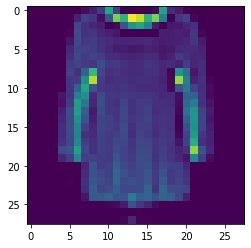

In [10]:
import random
idx = random.randint(0, len(trainX))
plt.imshow(trainX[idx,:])
plt.show()

## Applying CNN Model

In [23]:
model = Sequential([
        Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),
        Dense(units = 128,activation = 'relu'),
        Dropout(0.25),
        Dense(units = 256,activation = 'relu'),
        Dropout(0.5),
        Dense(units = 256,activation = 'relu'),
        Dropout(0.25),
        Dense(units = 128,activation = 'relu'),
        Dropout(0.10),
        Dense(units = 10,activation = 'softmax')  
                        
])

In [24]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 64)        

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [28]:
model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
118/118 [==============================] - 64s 543ms/step - loss: 0.8887 - accuracy: 0.6422 - val_loss: 0.5730 - val_accuracy: 0.7808
Epoch 2/5
118/118 [==============================] - 66s 560ms/step - loss: 0.5379 - accuracy: 0.7976 - val_loss: 0.4936 - val_accuracy: 0.7984
Epoch 3/5
118/118 [==============================] - 65s 551ms/step - loss: 0.4454 - accuracy: 0.8366 - val_loss: 0.4037 - val_accuracy: 0.8491
Epoch 4/5
118/118 [==============================] - 65s 546ms/step - loss: 0.3857 - accuracy: 0.8630 - val_loss: 0.3709 - val_accuracy: 0.8656
Epoch 5/5
118/118 [==============================] - 66s 558ms/step - loss: 0.3451 - accuracy: 0.8770 - val_loss: 0.3172 - val_accuracy: 0.8873


In [29]:
model.evaluate(testX, testy)

313/313 [==============================] - 4s 13ms/step - loss: 0.3172 - accuracy: 0.8873


[0.31716692447662354, 0.8873000144958496]

### Effect of Different Activation Functions

### GELU

In [32]:
model = Sequential([
        Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'gelu' ,input_shape = [28,28,1]), # 1st Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'gelu' ,input_shape = [28,28,1]), # 2nd Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'gelu' ,input_shape = [28,28,1]), # 3rd Layer
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),
        Dense(units = 128,activation = 'gelu'),
        Dropout(0.25),
        Dense(units = 256,activation = 'gelu'),
        Dropout(0.5),
        Dense(units = 256,activation = 'gelu'),
        Dropout(0.25),
        Dense(units = 128,activation = 'gelu'),
        Dropout(0.10),
        Dense(units = 10,activation = 'softmax')  
                        
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))
    

Epoch 1/5
118/118 [==============================] - 137s 1s/step - loss: 1.0991 - accuracy: 0.5735 - val_loss: 0.6424 - val_accuracy: 0.7588
Epoch 2/5
118/118 [==============================] - 126s 1s/step - loss: 0.5752 - accuracy: 0.7788 - val_loss: 0.4974 - val_accuracy: 0.8099
Epoch 3/5
118/118 [==============================] - 130s 1s/step - loss: 0.4816 - accuracy: 0.8192 - val_loss: 0.4476 - val_accuracy: 0.8297
Epoch 4/5
118/118 [==============================] - 126s 1s/step - loss: 0.4202 - accuracy: 0.8443 - val_loss: 0.3952 - val_accuracy: 0.8524
Epoch 5/5
118/118 [==============================] - 126s 1s/step - loss: 0.3830 - accuracy: 0.8584 - val_loss: 0.3700 - val_accuracy: 0.8605


In [33]:
model.evaluate(testX, testy)

313/313 [==============================] - 7s 22ms/step - loss: 0.3700 - accuracy: 0.8605


[0.36998113989830017, 0.8604999780654907]

### ELU

In [34]:
model = Sequential([
        Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'elu' ,input_shape = [28,28,1]), # 1st Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'elu' ,input_shape = [28,28,1]), # 2nd Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'elu' ,input_shape = [28,28,1]), # 3rd Layer
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),
        Dense(units = 128,activation = 'elu'),
        Dropout(0.25),
        Dense(units = 256,activation = 'elu'),
        Dropout(0.5),
        Dense(units = 256,activation = 'elu'),
        Dropout(0.25),
        Dense(units = 128,activation = 'elu'),
        Dropout(0.10),
        Dense(units = 10,activation = 'softmax')  
                        
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))
    

Epoch 1/5
118/118 [==============================] - 71s 585ms/step - loss: 0.7845 - accuracy: 0.7013 - val_loss: 0.5142 - val_accuracy: 0.8072
Epoch 2/5
118/118 [==============================] - 77s 655ms/step - loss: 0.4573 - accuracy: 0.8332 - val_loss: 0.4265 - val_accuracy: 0.8442
Epoch 3/5
118/118 [==============================] - 79s 670ms/step - loss: 0.3807 - accuracy: 0.8616 - val_loss: 0.3612 - val_accuracy: 0.8673
Epoch 4/5
118/118 [==============================] - 81s 684ms/step - loss: 0.3350 - accuracy: 0.8792 - val_loss: 0.3300 - val_accuracy: 0.8819
Epoch 5/5
118/118 [==============================] - 81s 689ms/step - loss: 0.3048 - accuracy: 0.8904 - val_loss: 0.3239 - val_accuracy: 0.8821


In [35]:
model.evaluate(testX, testy)

313/313 [==============================] - 5s 15ms/step - loss: 0.3239 - accuracy: 0.8821


[0.3239170014858246, 0.882099986076355]

### SELU

In [36]:
model = Sequential([
        Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'selu' ,input_shape = [28,28,1]), # 1st Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'selu' ,input_shape = [28,28,1]), # 2nd Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'selu' ,input_shape = [28,28,1]), # 3rd Layer
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),
        Dense(units = 128,activation = 'selu'),
        Dropout(0.25),
        Dense(units = 256,activation = 'selu'),
        Dropout(0.5),
        Dense(units = 256,activation = 'selu'),
        Dropout(0.25),
        Dense(units = 128,activation = 'selu'),
        Dropout(0.10),
        Dense(units = 10,activation = 'softmax')  
                        
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))
    

Epoch 1/5
118/118 [==============================] - 83s 675ms/step - loss: 0.6944 - accuracy: 0.7480 - val_loss: 0.4474 - val_accuracy: 0.8320
Epoch 2/5
118/118 [==============================] - 84s 711ms/step - loss: 0.4184 - accuracy: 0.8494 - val_loss: 0.3750 - val_accuracy: 0.8623
Epoch 3/5
118/118 [==============================] - 71s 598ms/step - loss: 0.3542 - accuracy: 0.8737 - val_loss: 0.3578 - val_accuracy: 0.8749
Epoch 4/5
118/118 [==============================] - 69s 583ms/step - loss: 0.3152 - accuracy: 0.8875 - val_loss: 0.3296 - val_accuracy: 0.8813
Epoch 5/5
118/118 [==============================] - 68s 579ms/step - loss: 0.2848 - accuracy: 0.8974 - val_loss: 0.3267 - val_accuracy: 0.8851


In [37]:
model.evaluate(testX, testy)

313/313 [==============================] - 4s 12ms/step - loss: 0.3267 - accuracy: 0.8851


[0.3266645073890686, 0.8851000070571899]

### Applying Different Optimizers

In [38]:
model = Sequential([
        Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
        MaxPooling2D(pool_size = (2,2)),

        Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),
        Dense(units = 128,activation = 'relu'),
        Dropout(0.25),
        Dense(units = 256,activation = 'relu'),
        Dropout(0.5),
        Dense(units = 256,activation = 'relu'),
        Dropout(0.25),
        Dense(units = 128,activation = 'relu'),
        Dropout(0.10),
        Dense(units = 10,activation = 'softmax')  
                        
])

In [39]:
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
118/118 [==============================] - 79s 650ms/step - loss: 1.3289 - accuracy: 0.4711 - val_loss: 0.7293 - val_accuracy: 0.7161
Epoch 2/5
118/118 [==============================] - 64s 546ms/step - loss: 0.6922 - accuracy: 0.7388 - val_loss: 0.6006 - val_accuracy: 0.7812
Epoch 3/5
118/118 [==============================] - 68s 576ms/step - loss: 0.5391 - accuracy: 0.7994 - val_loss: 0.5752 - val_accuracy: 0.8007
Epoch 4/5
118/118 [==============================] - 66s 561ms/step - loss: 0.4604 - accuracy: 0.8319 - val_loss: 0.4658 - val_accuracy: 0.8219
Epoch 5/5
118/118 [==============================] - 67s 568ms/step - loss: 0.4038 - accuracy: 0.8533 - val_loss: 0.3740 - val_accuracy: 0.8664


In [40]:
model.evaluate(testX, testy)

313/313 [==============================] - 5s 16ms/step - loss: 0.3740 - accuracy: 0.8664


[0.37399888038635254, 0.8664000034332275]

In [41]:
model.compile(optimizer = 'Adagrad', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
118/118 [==============================] - 76s 619ms/step - loss: 0.3476 - accuracy: 0.8755 - val_loss: 0.3444 - val_accuracy: 0.8739
Epoch 2/5
118/118 [==============================] - 62s 527ms/step - loss: 0.3374 - accuracy: 0.8789 - val_loss: 0.3414 - val_accuracy: 0.8744
Epoch 3/5
118/118 [==============================] - 62s 523ms/step - loss: 0.3334 - accuracy: 0.8800 - val_loss: 0.3395 - val_accuracy: 0.8747
Epoch 4/5
118/118 [==============================] - 62s 524ms/step - loss: 0.3291 - accuracy: 0.8808 - val_loss: 0.3381 - val_accuracy: 0.8757
Epoch 5/5
118/118 [==============================] - 63s 535ms/step - loss: 0.3298 - accuracy: 0.8806 - val_loss: 0.3367 - val_accuracy: 0.8756


In [42]:
model.evaluate(testX, testy)

313/313 [==============================] - 5s 14ms/step - loss: 0.3367 - accuracy: 0.8756


[0.3367289900779724, 0.8755999803543091]

In [43]:
model.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 5,batch_size = 512,verbose = 1, validation_data=(testX,testy))

Epoch 1/5
118/118 [==============================] - 68s 547ms/step - loss: 0.3281 - accuracy: 0.8829 - val_loss: 0.3209 - val_accuracy: 0.8846
Epoch 2/5
118/118 [==============================] - 64s 538ms/step - loss: 0.2970 - accuracy: 0.8928 - val_loss: 0.3020 - val_accuracy: 0.8928
Epoch 3/5
118/118 [==============================] - 62s 527ms/step - loss: 0.2855 - accuracy: 0.8986 - val_loss: 0.2912 - val_accuracy: 0.8955
Epoch 4/5
118/118 [==============================] - 63s 533ms/step - loss: 0.2704 - accuracy: 0.9037 - val_loss: 0.2887 - val_accuracy: 0.8959
Epoch 5/5
118/118 [==============================] - 64s 542ms/step - loss: 0.2590 - accuracy: 0.9085 - val_loss: 0.2810 - val_accuracy: 0.8993


In [44]:
model.evaluate(testX, testy)

313/313 [==============================] - 4s 12ms/step - loss: 0.2810 - accuracy: 0.8993


[0.2810269594192505, 0.8992999792098999]

### Applying AlexNet Architecture

In [47]:
model = Sequential()
    

model.add(Conv2D(filters=96, kernel_size=(11,11),input_shape = (28, 28, 1), activation = 'relu'))                 
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten()),
model.add(Dense(units = 128,activation = 'relu')),
model.add(Dropout(0.25)),
model.add(Dense(units = 256,activation = 'relu')),
model.add(Dropout(0.5)),
model.add(Dense(units = 256,activation = 'relu')),
model.add(Dropout(0.25)),
model.add(Dense(units = 128,activation = 'relu')),
model.add(Dropout(0.10)),
model.add(Dense(units = 10,activation = 'softmax'))

In [49]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(trainX,trainy,epochs = 1,batch_size = 512,verbose = 1, validation_data=(testX,testy))

118/118 [==============================] - 1090s 9s/step - loss: 0.6650 - accuracy: 0.7610 - val_loss: 3.4205 - val_accuracy: 0.1243


In [50]:
model.evaluate(testX, testy)

313/313 [==============================] - 29s 92ms/step - loss: 3.4205 - accuracy: 0.1243


[3.420466899871826, 0.12430000305175781]